In [1]:
import os
#dir_ = "C:\\Users\\mqayum2\\Box\\Spring 2024\\Data Science\\Data Science Final Project"
dir_ = "C:/Users/zalian2/OneDrive - University of Illinois - Urbana/UIUC/Spring 2024/ACE 592 SAE/ACE_592_Project/"
os.chdir(dir_)

os.getcwd()

'C:\\Users\\zalian2\\OneDrive - University of Illinois - Urbana\\UIUC\\Spring 2024\\ACE 592 SAE\\ACE_592_Project'

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\zalian2\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zalian2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Average sentiment score for the drug  Ozempic is: -0.1537176
Average sentiment score for the drug  Sitagliptin is: -0.2973976
Average sentiment score for the drug  Mounjaro is: -0.1175864
Average sentiment score for the drug  Rybelsus is: -0.0889928
Average sentiment score for the drug  Victoza is: 0.13205999999999998
Average sentiment score for the drug  Jardiance is: -0.08390399999999999


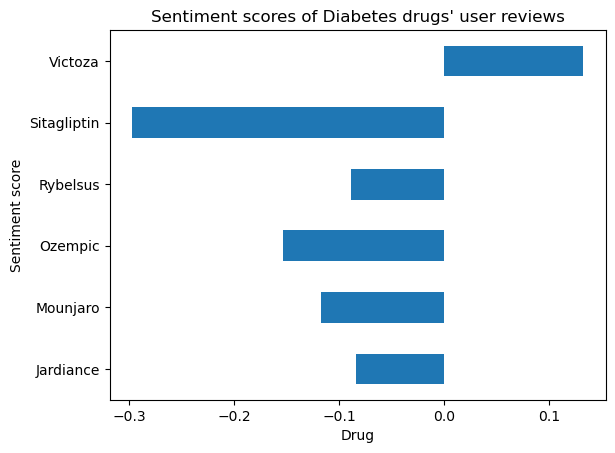

In [2]:
%run Sentiment_Analysis.ipynb

## LASSO

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


X = StandardScaler().fit_transform(data.iloc[:, :-1])

y = StandardScaler().fit_transform(data[['sentiment']])

def get_coefs(alpha,features,target):
    X = StandardScaler().fit_transform(data[features])
    y = StandardScaler().fit_transform(data[target])
    
    lasso_model =Lasso(alpha=alpha)
    lasso_model = lasso_model.fit(y=y,X=X)
    
    coefs = lasso_model.coef_
    
    return coefs

model = Lasso(alpha=.1)
model = model.fit(X=X,y=y)



In [4]:
initial_words = list(data[words].loc[:,model.coef_!=0].columns)
# Get a list of all of the coefficients which are themselves a list for every value of the grid
Alpha = np.arange(0,1,.01)
out = [list(get_coefs(a,initial_words,['sentiment'])) for a in Alpha]

C:\Users\zalian2\.conda\envs\ace-592-sae\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\zalian2\.conda\envs\ace-592-sae\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\zalian2\.conda\envs\ace-592-sae\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.992e+02, tolerance: 7.500e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/R

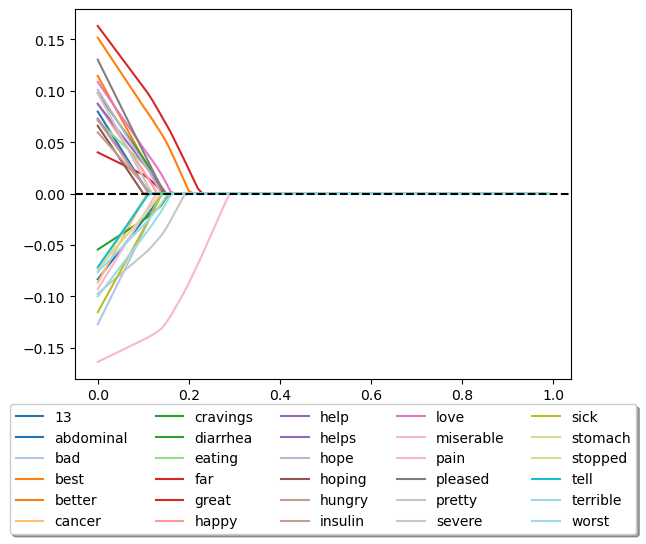

In [5]:

# Make a dataframe because its easier to plot
df_ = pd.DataFrame(out,columns=initial_words,index=Alpha)
                            #  word labels         alpha vals
# Plot it over alpha
df_.plot(cmap="tab20") # this colormap is easier to see
plt.axhline(0,color='black',ls="--") # origin line
#plt.axvline(lasso_model.alpha_,color='black',ls="--") # a vertical line for the optimal value of alpha
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5) # Putting the legend below the graph


In [6]:
## Getting the optimal value of alpaha
Alpha2 = np.arange(0,.012,.0001)
# Fitting the LassoCV model with 10-fold cross validation
lasso_model = LassoCV(alphas=Alpha2,cv=10)

# Fit the data
lasso_model = lasso_model.fit(X=X,y=y)


C:\Users\zalian2\.conda\envs\ace-592-sae\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\zalian2\.conda\envs\ace-592-sae\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\zalian2\.conda\envs\ace-592-sae\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\zalian2\.conda\envs\ace-592-sae\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected re

In [7]:
## Optimal alpha
lasso_model.alpha_

0.0119

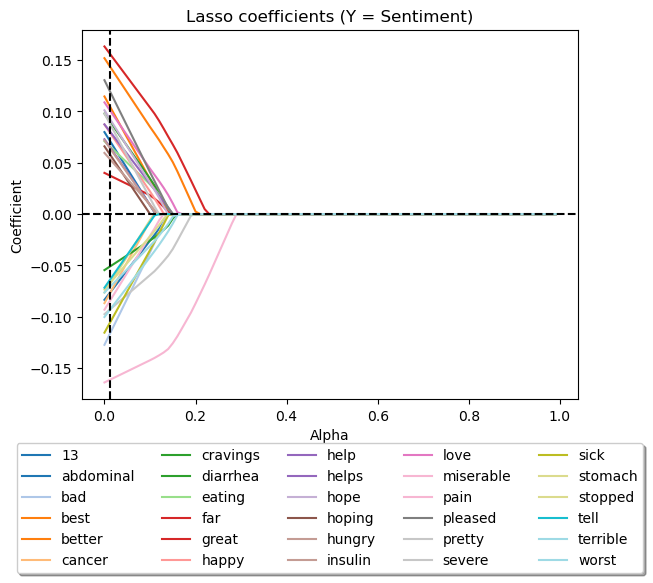

In [8]:
## Plotting again but after adding a vertical line for the optimal alpha value

# Plot it over alpha
df_.plot(cmap="tab20") # this colormap is easier to see
plt.title("Lasso coefficients (Y = Sentiment)")
plt.xlabel("Alpha")
plt.ylabel("Coefficient")
plt.axhline(0,color='black',ls="--") # origin line
plt.axvline(lasso_model.alpha_,color='black',ls="--") # a vertical line for the optimal value of alpha
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=5) # Putting the legend below the graph


In [9]:
final_words = list(data[words].loc[:,lasso_model.coef_!=0].columns)

Which were the most important?

Alot of them are very small, let's just look at ones that were more than .015 in either direction:

In [10]:
final_coefs = pd.DataFrame([words,lasso_model.coef_]).T

final_coefs = final_coefs.set_index(0)

final_coefs = final_coefs[final_coefs[1]!=0]

import numpy as np
final_coefs["abs_"] = np.abs(final_coefs[1])

In [11]:
final_coefs.sort_values(by='abs_', ascending=False)

,1,abs_
0,,
great,0.159373,0.159373
best,0.133371,0.133371
bad,-0.128988,0.128988
pain,-0.126081,0.126081
loss,-0.112742,0.112742
...,...,...
therapy,0.0,0.0
instructor,-0.0,0.0
digesting,0.0,0.0


In [12]:
final_coefs[final_coefs['abs_']>.015].sort_values(by='abs_', ascending=False)

,1,abs_
0,,
great,0.159373,0.159373
best,0.133371,0.133371
bad,-0.128988,0.128988
pain,-0.126081,0.126081
loss,-0.112742,0.112742
...,...,...
positive,0.01521,0.01521
intolerable,0.015209,0.015209
spent,-0.015151,0.015151


## Most Postive Words

In [13]:
positive_words=final_coefs[final_coefs[1]>.04].sort_values(by=1, ascending=False).reset_index()
positive_words

,0,1,abs_
0,great,0.159373,0.159373
1,best,0.133371,0.133371
2,pleased,0.095841,0.095841
3,happy,0.090437,0.090437
4,hope,0.084965,0.084965
5,helps,0.083453,0.083453
6,better,0.073701,0.073701
7,thirsty,0.0708,0.0708
8,love,0.067094,0.067094
9,13,0.067053,0.067053


In [14]:
positive_words[0]

0                   great
1                    best
2                 pleased
3                   happy
4                    hope
5                   helps
6                  better
7                 thirsty
8                    love
9                      13
10                   good
11                 hoping
12              excellent
13                smelled
14                   care
15                     ml
16                  close
17             definitely
18                  apart
19                   help
20                  boost
21               cravings
22                 helped
23              satisfied
24           occasionally
25                   safe
26    medicalprescription
27                 pretty
28                    aid
Name: 0, dtype: object

In [15]:
len(positive_words)

29

In [16]:
## We want to visualize the positive words that are most predictive of high sentiment score
## We will show them in a word cloud. Even though a word cloud is usually created to present the frequencies of words, we will use it
## here to show the most predictive positive words. The way we will do it is that we will create an artifical "frequency" of the words
## such that the most positive words will have a higher frequency. Basically, this frequency will be based on the ranking of the word.

## We arbitrarily chose a cutoff for the positive words above to include a limited number of words (29 in this case). Now we will create a ranking
## column based on the coefficient value of the words

In [17]:
positive_words['ranking'] = positive_words['abs_'].rank(method='dense', ascending=True)
positive_words

,0,1,abs_,ranking
0,great,0.159373,0.159373,29.0
1,best,0.133371,0.133371,28.0
2,pleased,0.095841,0.095841,27.0
3,happy,0.090437,0.090437,26.0
4,hope,0.084965,0.084965,25.0
5,helps,0.083453,0.083453,24.0
6,better,0.073701,0.073701,23.0
7,thirsty,0.0708,0.0708,22.0
8,love,0.067094,0.067094,21.0
9,13,0.067053,0.067053,20.0


In [18]:
## Creating a dictionary of words and their "frequencies"/rankings
pos_dic = positive_words.set_index(0).to_dict()['ranking']


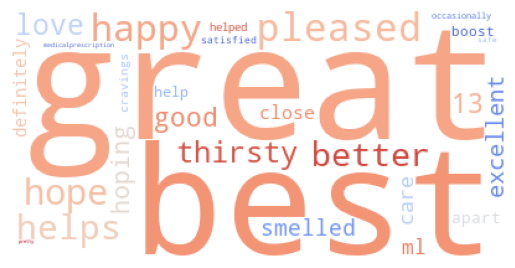

In [19]:
## Creating the word cloud
wordcloud = WordCloud(background_color='white', colormap='coolwarm')
wordcloud.generate_from_frequencies(pos_dic)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Most Negative Words

In [20]:
## We will repeat the process for negative words. We will choose the cutoff arbitrarily
#negative_words = final_coefs[final_coefs[1]<-0.015].sort_values(by=1, ascending=True)

negative_words=final_coefs[final_coefs[1]<-.03].sort_values(by=1, ascending=True).reset_index()
negative_words

,0,1,abs_
0,bad,-0.128988,0.128988
1,pain,-0.126081,0.126081
2,loss,-0.112742,0.112742
3,sick,-0.075415,0.075415
4,ill,-0.074496,0.074496
5,severe,-0.072312,0.072312
6,worst,-0.06988,0.06988
7,stomach,-0.068189,0.068189
8,terrible,-0.061627,0.061627
9,february,-0.06009,0.06009


In [21]:
len(negative_words)

37

In [22]:
negative_words['ranking'] = negative_words['abs_'].rank(method='dense', ascending=True)
## Creating a dictionary of words and their "frequencies"/rankings
neg_dic = negative_words.set_index(0).to_dict()['ranking']


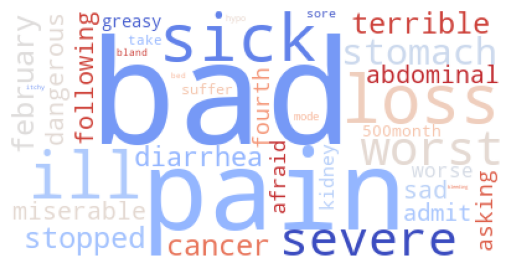

In [23]:
## Creating the word cloud
wordcloud = WordCloud(background_color='white', colormap='coolwarm')
wordcloud.generate_from_frequencies(neg_dic)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()